# Uso de modelos de embeddings de OpenAI


## Instalación y carga de librerías


In [1]:
import json
import pandas as pd
from ast import literal_eval

## Cargar dataset


In [2]:
df = pd.read_json("data/9-12-database.json")

In [3]:
df.sample(5)

,_id,url,category,crawled_at,crawling_session,description,images,name,price,stock,store,tags,normalized_category
10460,{'$oid': '65685a3fbfa63cc9046e5be8'},https://www.selfieleslie.com/products/miffy-do...,dress,{'$date': '2023-11-29T02:16:43.537Z'},{'$date': '2023-12-07T18:45:34.110Z'},<p>Twirl through your day in our breezy Miffy ...,[https://cdn.shopify.com/s/files/1/0414/2622/3...,Miffy Double Frill Strapless Midi Dress Sage,{'$numberDecimal': '24.50'},True,www.selfieleslie.com,"[500, 911, back to school, dresses, final sale...",dress
33690,{'$oid': '65685a56bfa63cc9046ed036'},https://sourceunknown.com/products/organic-cot...,dress,{'$date': '2023-11-29T07:22:53.263Z'},None,"<p class=""p1"">100% Organic Cotton</p>\n<p clas...",[https://cdn.shopify.com/s/files/1/0300/3878/6...,"Organic Cotton Knit Dress, Bark",{'$numberDecimal': '132.00'},True,sourceunknown.com,[],dress
17420,{'$oid': '65685a41bfa63cc9046e7bbd'},https://www.selfieleslie.com/products/marvehl-...,dress,{'$date': '2023-11-29T03:41:37.124Z'},{'$date': '2023-12-07T18:45:34.110Z'},<ul>\n<li>Sage midi dress</li>\n<li>Ribbed fab...,[https://cdn.shopify.com/s/files/1/0414/2622/3...,Marvehl Twisted Bust Thigh Split Ribbed Midi D...,{'$numberDecimal': '75.99'},True,www.selfieleslie.com,"[500, 903, 906, 911, 923, 924, 972, 973, 993, ...",dress
17633,{'$oid': '65685a41bfa63cc9046e7cce'},https://www.selfieleslie.com/products/linka-of...,dress,{'$date': '2023-11-29T03:44:13.229Z'},{'$date': '2023-12-07T18:45:34.110Z'},<ul>\n<li>Beige marbled print midi dress</li>\...,[https://cdn.shopify.com/s/files/1/0414/2622/3...,Linka Off-Shoulder Tie Back Midi Dress Marbled...,{'$numberDecimal': '79.99'},True,www.selfieleslie.com,"[500, 909, back to school, bestsellers, dresse...",dress
18989,{'$oid': '65685a51bfa63cc9046e8bf5'},https://www.selfieleslie.com/products/glennon-...,dress,{'$date': '2023-11-29T04:00:50.182Z'},{'$date': '2023-12-07T18:45:34.110Z'},<ul>\n<li>White dress</li>\n<li>Not lined</li>...,[https://cdn.shopify.com/s/files/1/0414/2622/3...,Glennon Crochet Shirt Dress White,{'$numberDecimal': '32.00'},True,www.selfieleslie.com,"[120, 500, 512, 900, 909, 965, 973, au launch,...",dress


In [4]:
def concat_list(lista: list) -> str:
    return " ".join(lista)

Convertimos a string las tags


In [5]:
df["tags"] = df["tags"].apply(concat_list)

In [27]:
df["images"] = df["images"].apply(concat_list)

Hacemos un merge de los nombres y las categorias


In [6]:
df["text"] = df.apply(lambda x: str(x["name"]) + " " + x["category"], axis=1)

Convertimos a flotante los numberDecimal de mongodb


In [7]:
def get_number(precio):
    valor = next(iter(precio.values()))
    return float(valor)

In [8]:
df["price"] = df["price"].apply(get_number)

Concatenamos todo lo que queremos embeber en "text" y dropeamos tags ya que no nos sirve


In [9]:
df["text"] = df.apply(lambda x: str(x["tags"]) + " " + x["text"], axis=1)
df.drop("tags", axis=1)

,_id,url,category,crawled_at,crawling_session,description,images,name,price,stock,store,normalized_category,text
0,{'$oid': '6565ff497056e9fffb633791'},https://nude-project.com/products/varsity-hood...,hoodie,{'$date': '2023-11-28T11:42:05.595Z'},{'$date': '2023-11-28T23:11:00.175Z'},"<meta charset=""utf-8""><span data-mce-fragment=...",[https://cdn.shopify.com/s/files/1/0025/3725/9...,VARSITY HOOD GREY MELANGE,94.8,True,nude-project.com,hoodie,details varsity new size guide hoodies update ...
1,{'$oid': '6565ff497056e9fffb633798'},https://nude-project.com/products/respect-tee-...,shirt,{'$date': '2023-11-29T06:14:43.558Z'},None,"<p>Every day, it's more probable that your nei...",[https://cdn.shopify.com/s/files/1/0025/3725/9...,RESPECT TEE OFF-WHITE,54.0,True,nude-project.com,t,details worldwide size guide nudeworld RESPECT...
2,{'$oid': '6565ff497056e9fffb633792'},https://nude-project.com/products/varsity-hood...,hoodie,{'$date': '2023-11-29T06:21:34.592Z'},None,"<meta charset=""utf-8"">\n<div class=""ProductMet...",[https://cdn.shopify.com/s/files/1/0025/3725/9...,VARSITY HOOD PURPLE,94.8,True,nude-project.com,hoodie,details pretty new size guide hoodies update V...
3,{'$oid': '6565ff497056e9fffb633795'},https://nude-project.com/products/tape-hood-pu...,hoodie,{'$date': '2023-11-29T06:14:41.187Z'},None,"<meta charset=""utf-8""><span data-mce-fragment=...",[https://cdn.shopify.com/s/files/1/0025/3725/9...,RECORD HOOD LAVANDER,106.8,True,nude-project.com,hoodie,details caramelitos size guide cherry hoodie R...
4,{'$oid': '6565ff497056e9fffb63379a'},https://nude-project.com/products/cult-hood-br...,hoodie,{'$date': '2023-11-29T06:14:45.008Z'},None,"<meta charset=""utf-8""><span data-mce-fragment=...",[https://cdn.shopify.com/s/files/1/0025/3725/9...,CULT*HOOD BROWN,94.8,True,nude-project.com,hoodie,details hood cult size guide hoodie cult CULT*...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39594,{'$oid': '65685a58bfa63cc9046eec42'},https://showmeyourmumu.com/products/kiran-saro...,accessory,{'$date': '2023-11-29T08:55:09.230Z'},None,"<p><meta charset=""utf-8""><strong>We've teamed ...",[https://cdn.shopify.com/s/files/1/2203/5897/p...,Kiran Sarong ~ Fruit Basket,34.0,True,showmeyourmumu.com,accessory,6 21 heather collab accessories final sale app...
39595,{'$oid': '65685a58bfa63cc9046eec44'},https://showmeyourmumu.com/products/alv-jewels...,accessory,{'$date': '2023-11-29T08:55:10.050Z'},None,<p>A beautiful neutral with a pop of floral fo...,[https://cdn.shopify.com/s/files/1/2203/5897/f...,ALV Jewels Clara Necklace ~ Ivory,56.0,True,showmeyourmumu.com,accessory,accessories final sale app promo final sale fo...
39596,{'$oid': '65685a58bfa63cc9046eec46'},https://showmeyourmumu.com/products/gorjana-sh...,accessory,{'$date': '2023-11-29T08:55:10.902Z'},None,"<p>Universally flattering and simply stylish, ...",[https://cdn.shopify.com/s/files/1/2203/5897/p...,Gorjana Shawn Statement Earrings ~ Gold,75.0,True,showmeyourmumu.com,accessory,6 21 heather collab accessories final sale app...
39597,{'$oid': '65685a58bfa63cc9046eec47'},https://showmeyourmumu.com/products/gorjana-sh...,accessory,{'$date': '2023-11-29T08:55:11.759Z'},None,"<p>Universally flattering and simply stylish, ...",[https://cdn.shopify.com/s/files/1/2203/5897/p...,Gorjana Shawn Hoop Earrings ~ 18K Gold Plated,65.0,True,showmeyourmumu.com,accessory,accessories final sale app promo final sale ss...


## Generando emebeddings


In [11]:
from sentence_transformers import SentenceTransformer

/home/mateo/sirvana/usa/notebooks/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Elejimos el modelo y los embeddings


In [12]:
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

In [13]:
embeddings = model.encode(df["text"], batch_size=64, show_progress_bar=True)

Batches: 100%|██████████| 619/619 [02:53<00:00,  3.57it/s]


In [14]:
df["embeddings"] = embeddings.tolist()

Entramos dentro del valor del id de mongodb (recordemos que es un dict)


In [15]:
def get_value(element):
    valor = str(next(iter(element.values())))
    return valor

In [16]:
df["ids"] = df.index
df["ids"] = df["ids"].astype("str")

In [17]:
df["_id"] = df["_id"].apply(get_value)

In [18]:
df.sample()

,_id,url,category,crawled_at,crawling_session,description,images,name,price,stock,store,tags,normalized_category,text,embeddings,ids
35523,65685a56bfa63cc9046ed8c6,https://mondayswimwear.com/products/st-barths-...,swim,{'$date': '2023-11-29T08:00:30.659Z'},None,"<meta charset=""utf-8"">\n<h2>Irresistible<br>\n...",[https://cdn.shopify.com/s/files/1/2352/6823/p...,St. Barth's One Piece - Black,65681.0,True,mondayswimwear.com,black category one piece cheeky color black co...,swim,black category one piece cheeky color black co...,"[0.015658361837267876, 0.06733814626932144, 0....",35523


In [19]:
df = df.drop(["tags", "crawled_at", "crawling_session"], axis=1)

In [20]:
df.sample()

,_id,url,category,description,images,name,price,stock,store,normalized_category,text,embeddings,ids
32029,65685a55bfa63cc9046ec849,https://sourceunknown.com/products/knotted-hee...,shoe,"<p data-mce-fragment=""1"">Upper: 100% PU</p>\n<...",[https://cdn.shopify.com/s/files/1/0300/3878/6...,"Knotted Heeled Mules, Burgundy",78.0,True,sourceunknown.com,shoe,"Knotted Heeled Mules, Burgundy shoe","[-0.03960420936346054, 0.0069221812300384045, ...",32029


# Subiendo a DB


#### Chroma


In [21]:
import chromadb
from chromadb.utils import embedding_functions

La utilizacion del modelo es para procesar el input que va a la base de datos


In [22]:
sentence_transformer_ef = embedding_functions.SentenceTransformerEmbeddingFunction(
    model_name="all-MiniLM-L6-v2"
)

In [23]:
chroma_client = chromadb.Client()

In [ ]:
chroma_client.delete_collection("products_db")

In [24]:
db = chroma_client.create_collection(
    name="products_db", embedding_function=sentence_transformer_ef
)

In [ ]:
db.add(
    ids=df["ids"].tolist(),
    embeddings=df["embeddings"].tolist(),
    metadatas=df.drop(["ids", "embeddings"], axis=1).to_dict("records"),
)

# Visualizamos las queries


In [136]:
import json
import requests

import matplotlib.pyplot as plt

{
  "ids": [
    [
      "31335",
      "29531"
    ]
  ],
  "distances": [
    [
      0.7453899383544922,
      0.7859163880348206
    ]
  ],
  "metadatas": [
    [
      {
        "_id": "65685a55bfa63cc9046ec4fa",
        "category": "pant",
        "description": "<meta charset=\"utf-8\"><meta charset=\"utf-8\">\n<p>Soft-feel twill effect Straight Pants With Zippered Thigh Slits\u00a0<br></p>\n<p>2 Slant Pockets. Belt Loops. Back Welt Pockets<br></p>\n<p><span>Zip And Hook Closure.\u00a0</span><span>Elastic waistband</span></p>\n<p><span>Lightweight. Unlined</span></p>\n<p>Model Height: 5' 9\" (177 Cm)\u00a0</p>\n<p>machine wash cold</p>\n<p><span>29\" Inseam Length, 13\" Front Rise</span></p>\n<p><span>Stretchy Elastic Waist 24\"-32\"\u00a0</span></p>",
        "images": "https://cdn.shopify.com/s/files/1/0300/3878/6186/products/200812SU0694.jpg?v=1597849305 https://cdn.shopify.com/s/files/1/0300/3878/6186/products/200812SU0685.jpg?v=1597849305 https://cdn.shopify.com/s/files/1/0

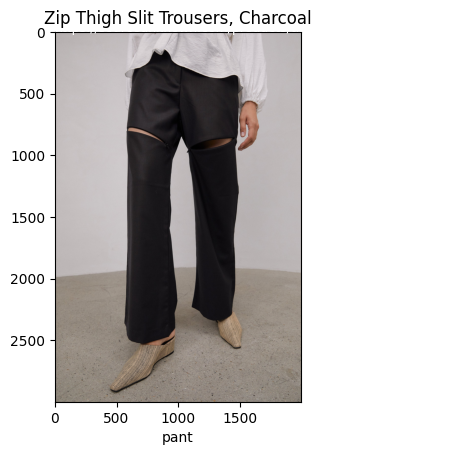

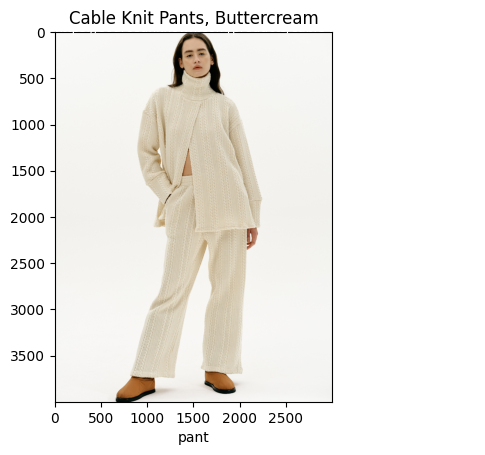

In [137]:
def query_db(input: str, n_results=2):
    results = db.query(query_texts=[input], n_results=n_results)
    print(json.dumps(results, indent=2))
    for confusion in results["metadatas"]:  # type: ignore
        for result in confusion:
            image_urls = result["images"].split()
            image = image_urls[0]
            try:
                response = requests.get(image)
                response.raise_for_status()  # Asegura que la solicitud fue exitosa
                img = Image.open(BytesIO(response.content))
                # Configurando Matplotlib para mostrar la imagen con texto
                plt.imshow(img)
                plt.title(result["name"])  # Puedes cambiar este texto
                plt.xlabel(result["category"])  # Puedes cambiar este texto
                plt.text(
                    0, 0, result["url"], fontsize=9, color="white"
                )  # Puedes cambiar este texto
                plt.show()
            except requests.RequestException as e:
                print(f"Error al descargar la imagen: {e}")


query_db("fishing pants")

{
  "ids": [
    [
      "31335",
      "29531"
    ]
  ],
  "distances": [
    [
      0.7453899383544922,
      0.7859163880348206
    ]
  ],
  "metadatas": [
    [
      {
        "_id": "65685a55bfa63cc9046ec4fa",
        "category": "pant",
        "description": "<meta charset=\"utf-8\"><meta charset=\"utf-8\">\n<p>Soft-feel twill effect Straight Pants With Zippered Thigh Slits\u00a0<br></p>\n<p>2 Slant Pockets. Belt Loops. Back Welt Pockets<br></p>\n<p><span>Zip And Hook Closure.\u00a0</span><span>Elastic waistband</span></p>\n<p><span>Lightweight. Unlined</span></p>\n<p>Model Height: 5' 9\" (177 Cm)\u00a0</p>\n<p>machine wash cold</p>\n<p><span>29\" Inseam Length, 13\" Front Rise</span></p>\n<p><span>Stretchy Elastic Waist 24\"-32\"\u00a0</span></p>",
        "images": "https://cdn.shopify.com/s/files/1/0300/3878/6186/products/200812SU0694.jpg?v=1597849305 https://cdn.shopify.com/s/files/1/0300/3878/6186/products/200812SU0685.jpg?v=1597849305 https://cdn.shopify.com/s/files/1/0

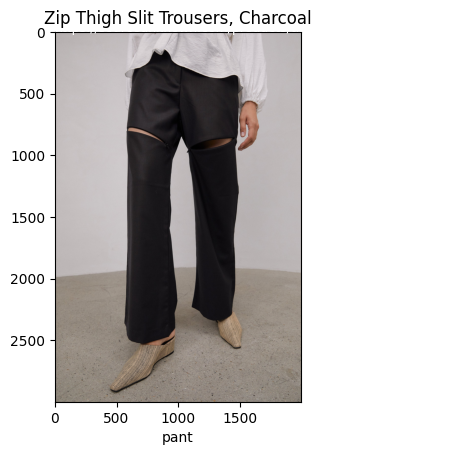

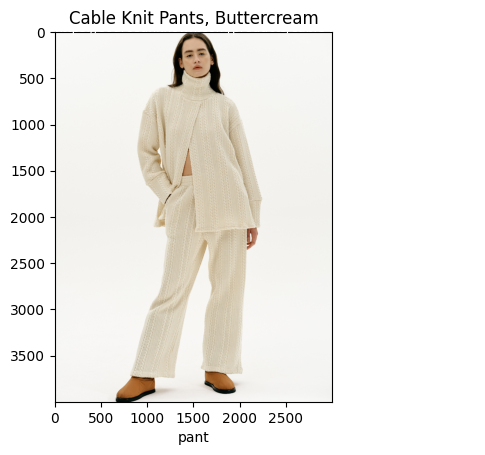

In [135]:
query_db("fishing pants")